# Requirements

In [1]:

#pip install opencv-python


# Imports

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io


# Reasearch


**Can OpenCV detect everything? Or, Do I need to prepare my own pretrained model?**

> OpenCV's pre-trained Haar Cascade classifiers: **face, eye, smile, full body, pedestrian, silverware, licence plate detection**

>  https://github.com/opencv/opencv

**What pre-trained models are available?**

- pretrained YOLO model for object detection

> https://pjreddie.com/darknet/yolo/

- pretrained ImageNet models in TensorFlow and Keras

- pretrained model from Caffe Framework

- pretrained SSD model (Single shot multibox detector)

> https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

> models pretrianed on the COCO 2017 Dataset: CenterNet HourGlass104, CenterNet Resnet50, CenterNet MobileNetV2, Efficient Det, SSD MobileNet, SSD ResNet, Faster R-CNN ResNet, Mask R-CNN ResNet, ExtremeNet

- PyTorch


# OpenCV

width: 640 pixels
height: 480 pixels
channels: 3


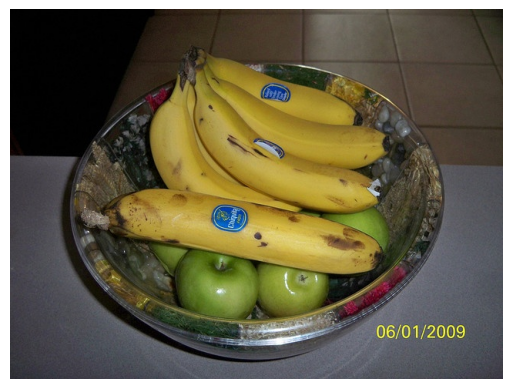

In [7]:

"""
Read the image. Show the height, width and the no. of channels.
"""

image_name = "train_image_458756.jpg"

image = cv2.imread(image_name)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

height = image_bgr.shape[0]
width = image_bgr.shape[1]
no_of_color_channels = image_bgr.shape[2]

print("width: {} pixels".format(width))
print("height: {} pixels".format(height))
print("channels: {}".format(no_of_color_channels))

# cv2.imshow()
# cv2.waitKey(0)

plt.axis('off')
plt.imshow(image_bgr)
plt.show()
        

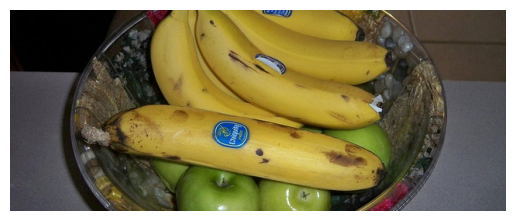

In [24]:

"""
Crop the image.
"""

# We can accom- plish image cropping by using NumPy array slicing. 
image_numpy_array = io.imread(image_name)

# The no. of pixels: 480 x 640
# Y-axis corresponds to the height.
# X-axis corresponds to the width.

# Start y: The starting y coordinate. In this case, we start at y = 80.
# End y: The ending y coordinate. We will end our crop at y = 480.
# Start x: The starting x coordinate of the slice. We start the crop at x = 0.
# End x: The ending x-axis coordinate of the slice. Our slice ends at x = 640

start_y = 110
end_y = 370

start_x = 0
end_x = 640

image_cropped = image_numpy_array[start_y:end_y, start_x:end_x, :]

plt.axis('off')
plt.imshow(image_cropped)
plt.show()
    

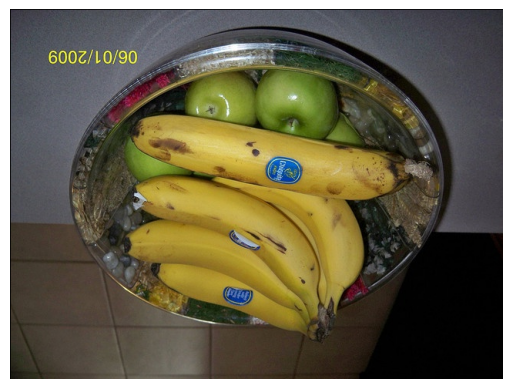

In [15]:

"""
Rotate the image by some angle.
"""

# When we rotate an image, we need to specify around which point we want to rotate.
# In most cases, you will want to rotate around the center of an image.
center = (width//2, height//2)

# arg1 - the point at which we want to rotate the image around (in this case, the center of the image)
# arg2 - We then specify θ, the number of degrees we are going to rotate the image by.
# arg3 - The last argument is the scale of the image (resizing). 
#        A floating point value, where 1.0 means the same dimensions of the image are used. 
#        However, if you specified a value of 2.0 the image would be doubled in size.
matrix = cv2.getRotationMatrix2D(center, 180, 1.0)

image_rotated = cv2.warpAffine(image_bgr, matrix, (width, height))

plt.axis('off')
plt.imshow(image_rotated)
plt.show()


The no. of pixels: 480 x 640
The no. of pixels of the resized image: 150 x 112


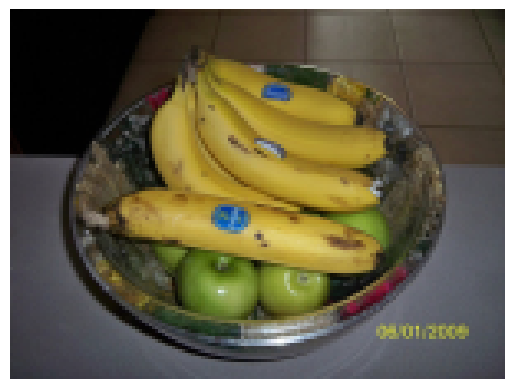

In [18]:

"""
Resize the image.
"""

print(f"The no. of pixels: {height} x {width}")

# The aspect ratio is the proportional relationship of the width and the height of the image.
# We define our new image width to be 150 pixels.
new_width = 150
ratio = new_width / width

# The height is then computed by multiplying the old height by our ratio and converting it to an integer.
new_dimensions = (new_width, int(height * ratio))

# The last parameter is our interpolation method, which is the algorithm working behind the scenes to handle 
# how the actual image is resized.
# other appropriate choices include cv2.INTER_LINEAR, cv2.INTER_CUBIC, and cv2.INTER_NEAREST
image_resized = cv2.resize(image_bgr, new_dimensions, interpolation = cv2.INTER_AREA)

image_resized_height = image_resized.shape[0]
image_resized_width = image_resized.shape[1]

print(f"The no. of pixels of the resized image: {image_resized_width} x {image_resized_height}")

plt.axis('off')
plt.imshow(image_resized)
plt.show()


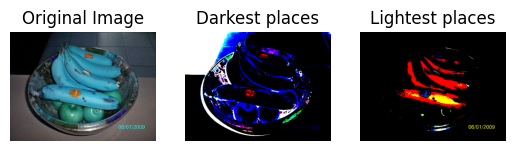

In [8]:

"""
Finding the brightest spot in the image.
"""

# Threshold for darkest places
# means that pixels with intensities above the threshold will be set to 0 (black), 
# and pixels below the threshold will be set to the maximum value (255),
_, threshold_dark = cv2.threshold(image_bgr, 30, 255, cv2.THRESH_BINARY_INV)

# Threshold for lightest places
_, threshold_light = cv2.threshold(image_bgr, 180, 255, cv2.THRESH_BINARY)

# Display the original image and the thresholded images
titles = ['Original Image', 'Darkest places', 'Lightest places']
images = [image, threshold_dark, threshold_light]

for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


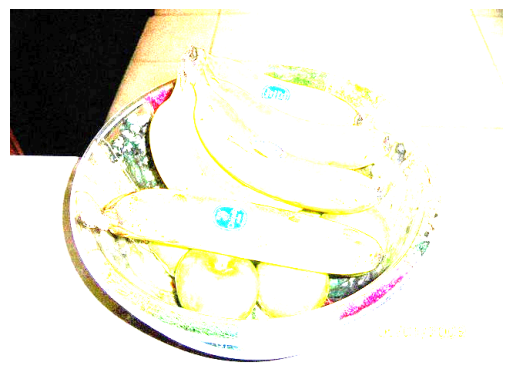

In [70]:

"""
The contrast and the brightness of an image.
https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html
"""

new_image = np.zeros(image_bgr.shape, image_bgr.dtype)

alpha = 8.0 # Simple contrast control
beta = 0.0    # Simple brightness control

# The np.clip function is a NumPy function that limits the values of an array to be within a specified range.
#  to perform the operation g(i,j)=α⋅f(i,j)+β
for y in range(height):
    for x in range(width):
        for c in range(no_of_color_channels):
            new_image[y,x,c] = np.clip(alpha*image_bgr[y,x,c] + beta, 0, 255)

plt.axis('off')
plt.imshow(new_image)
plt.show()


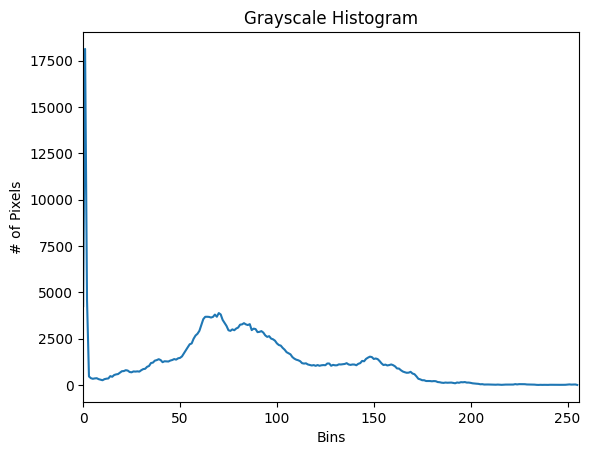

(255, 152, 0)


In [4]:

"""
By examining the histogram of an image, you get a general understanding regarding the contrast, brightness,
and intensity.

OpenCv: Image Histogram Calculations
By understanding the histogram, you can gain information about the image’s contrast, brightness, and overall 
tonal distribution.
So the image must contain more Black pixels if our histogram is shifted to the left (left-skewed) and the image 
must contain more White pixels if our histogram is shifted to the right (right-skewed).
https://medium.com/@sasasulakshi/opencv-image-histogram-calculations-4c5e736f85e

OpenCV Image Histograms
We use grayscale histograms for thresholding. We use histograms for white balancing. We use color histograms for 
object tracking in images, such as with the CamShift algorithm.
https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/
"""

# The bins (0-255) are plotted on the x-axis. 
# And the y-axis counts the number of pixels in each bin.
# Percentage calculation: pixels count / total count * 100

image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image_grey], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

# Interpretation:
# black color is occuring hte most in the image
# the the grayscale values in the interval 60 - 70 are occuring the most. Let's say we will take the value 70 and convert it to the RGB by applying the color map.
grayscale_image = np.ones((1, 1), dtype=np.uint8) * 70
rgb_image = cv2.applyColorMap(grayscale_image, cv2.COLORMAP_JET)
print(tuple(rgb_image[0, 0, :]))

# The probability mass function


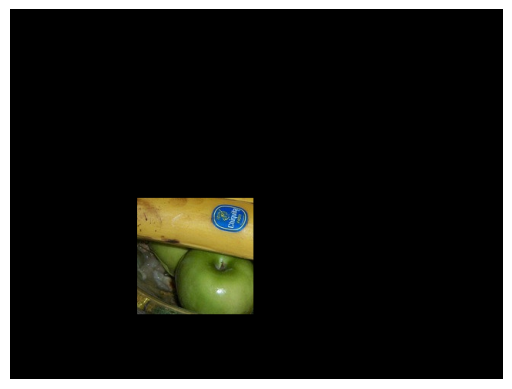

In [71]:

"""
Using a mask allows us to focus only on the portions of the image that interests us.

For example, let’s say that we were building a computer vision system to recognize faces. The only part of the image
we are interested in finding and describing are the parts of the image that contain faces – we simply don’t care 
about the rest of the content of the image. Provided that we could find the faces in the image, we might construct 
a mask to show only the faces in the image.

Our mask image – a white rectangle at the center of the image.
"""

# We construct a NumPy array, filled with zeros, with the same width and height as our image_bgr image.
mask = np.zeros(image_bgr.shape[:2], dtype = "uint8")

# In order to draw the white rectangle, we first compute the center of the image by dividing the width and 
# height by two.
(center_x, center_y) = (height // 2, width // 2)

# bitwise_and is a function that is used extensively when applying masks to images.
# A bitwise AND is true if and only if both pixels are greater than zero.
# The variable mask creates black canvas. The value of black is (0, 0, 0)
# Then we draw our white rectangle.
cv2.rectangle(mask, (center_x - 75, center_y - 75), (center_x + 75 , center_y + 75), 255, -1)

image_masked = cv2.bitwise_and(image_bgr, image_bgr, mask = mask)

plt.axis('off')
plt.imshow(image_masked)
plt.show()


# Yolo v3

In [4]:

image_id = '458756'
coco_classes = []

# Load YOLO
net = cv2.dnn.readNet("data/yolov3.weights", "data/yolov3.cfg")

# Load COCO class labels
with open("data/coco.names", "r") as f:
    coco_classes = [line.strip() for line in f]

# Load image
image = cv2.imread(f"data/train_image_{image_id}.jpg");height, width, _ = image.shape

print(height, width, _)


480 640 3


In [6]:

# Convert image to blob format
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


In [7]:

# This method is used to get the names of the unconnected output layers of the neural network
output_layers = net.getUnconnectedOutLayersNames()

# Run forward pass
outs = net.forward(output_layers)


In [10]:

# Information to display
class_ids = []
confidences = []
boxes = []

# Loop over each detection
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:  # Adjust confidence threshold as needed
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            

In [13]:

# Apply non-maximum suppression to remove overlapping boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [14]:

# Draw bounding boxes on the image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = f"{coco_classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = (0, 255, 0)  # Green color for the bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        

In [15]:

# Save image
image_name = f"detected_image_{image_id}.jpg"
cv2.imwrite(f"data/{image_name}", image)


True

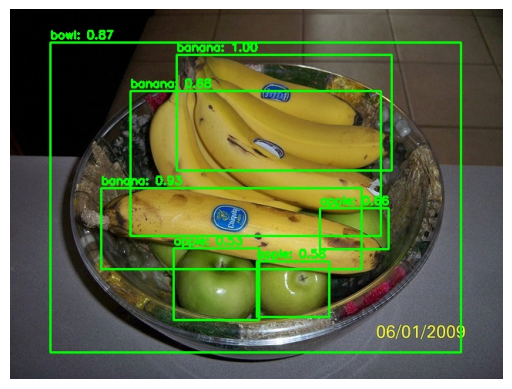

In [16]:

# load image with detected objects
image = cv2.imread("data/detected_image_458756.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

plt.imshow(image)
plt.axis('off')
plt.show()


# ObjectDetector

In [27]:

class ObjectDetector:
    pass
